In [15]:
# librerias para leer archivos wav
from scipy.io import wavfile
samplerate, tone3 = wavfile.read('./Tone1.wav')

<ipython-input-18-757b4d929a18>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  proc[i] = fft_sign[i]*np.exp(-(i-intvl*freq)**2/5000)


(0.0, 2500.0)

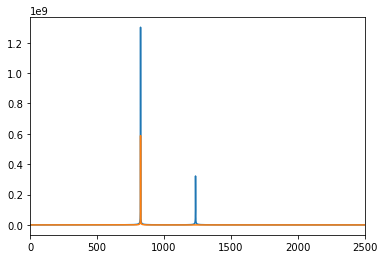

In [18]:
# graficar
import matplotlib.pyplot as plt
# numpy
import numpy as np
# calculando los coeficientes de la serie de Fourier
# del dominio del tiempo al doinio de frecuencias
tone_fft = np.fft.rfft(tone3)
intvl = np.shape(tone3)[0]//samplerate
# mapa de frecuencias
frec = np.linspace(0, np.shape(tone_fft)[0]//intvl, num=np.shape(tone_fft)[0])

# filtro Gaussiano - ancho de 50 Hz
def filt(fft_sign, freq):
    size = np.shape(fft_sign)[0]
    proc = np.zeros(size)
    for i in range (size):
        proc[i] = fft_sign[i]*np.exp(-(i-intvl*freq)**2/5000)
    return proc

# filtrado en el espacio de frecuencias - 830.609 Hz
# amp es un factor de amplificación, solo debe usarse si la señal es muy baja
# sino dejela en uno
amp = 1.0
fft_filt_f1 = amp*filt(tone_fft, 830.609)
# de vuelta a la señal original
# se necesita invertir la serie de Fourier
# del dominio de frecuencias al dominio del tiempo
filt_tone = np.fft.irfft(fft_filt_f1)
# graficando el modulo de los coeficientes de Fourier
plt.plot(frec, np.abs(tone_fft))
plt.plot(frec, np.abs(fft_filt_f1))
plt.xlim(0,2500)

In [19]:
# Escribiendo en archivo wav
from scipy.io.wavfile import write
write("filtro.wav", samplerate, filt_tone.astype(np.int16))